In [50]:
import pandas as pd
import numpy as np
import random  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import pearsonr
from sklearn.datasets import make_regression              # for simulating data     # splitting training and test data
from sklearn.linear_model import LinearRegression         # making the linear predictor model
from sklearn.metrics import mean_squared_error, r2_score  # compute some diagnostics
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from statsmodels.stats import weightstats as stests
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats as stats
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:


# Generate synthetic data
data = {
    'Age': [random.randint(18, 60) for _ in range(100)],
    'Gender': [random.choice(['Male', 'Female']) for _ in range(100)],
    'Income': [round(random.uniform(20000, 100000), 2) for _ in range(100)],
    'Education_Level': [random.choice(['Bachelor', 'Master', 'PhD']) for _ in range(100)],
    'Employment_Status': [random.choice(['Employed', 'Unemployed', 'Student','Self Employed', 'Retired']) for _ in range(100)],
    'Product_Category': [random.choice(['Electronics', 'Clothing', 'Books', 'Furniture']) for _ in range(100)],
    'Purchase_Amount': [round(random.uniform(50, 1000), 2) for _ in range(100)]
}

# Adjust the income and purchase amount for 25-year-olds, unemployed, and students
for i in range(100):
    if data['Age'][i] <= 25 or (data['Employment_Status'][i] == 'Unemployed' or data['Employment_Status'][i] == 'Student'):
        data['Income'][i] = round(random.uniform(10000, 30000), 2)  # Lower income
        data['Purchase_Amount'][i] = round(random.uniform(20, 500), 2)  # Lower spending
   
# Create a DataFrame
transactions = pd.DataFrame(data)

# Setting index to start at 1 to make more sense
transactions.index = range(1, len(transactions)+1)

# Display the first few rows of the DataFrame
transactions


,Age,Gender,Income,Education_Level,Employment_Status,Product_Category,Purchase_Amount
1,28,Male,80268.43,PhD,Employed,Books,350.73
2,52,Male,79191.15,Bachelor,Retired,Clothing,572.33
3,31,Male,86141.66,PhD,Employed,Books,923.71
4,18,Female,24397.47,Master,Retired,Furniture,172.81
5,38,Male,13396.79,Master,Unemployed,Furniture,216.98
...,...,...,...,...,...,...,...
96,54,Male,27230.73,Bachelor,Unemployed,Clothing,222.28
97,20,Female,19821.83,Bachelor,Self Employed,Furniture,340.13
98,29,Female,65716.96,Master,Employed,Furniture,791.90
99,53,Female,22751.10,Bachelor,Self Employed,Electronics,441.74


In [5]:
# Dropping the columns that dont matter to look to see
# if the data makes sense. Does it make sense for a 23yr old
# to have a PhD? Probably not
X = transactions.drop(columns=['Gender','Product_Category'])


for index, row in X.iterrows():
    if row['Age'] < 22:
        if row['Education_Level'] == 'PhD' or row['Education_Level'] == 'Master':
            X.loc[index, 'Education_Level'] = 'Bachelor'  # Update the 'Education_Level' column
        if row['Age'] <= 21:
            X.loc[index, 'Education_Level'] = 'In Progress'  # Update the 'Education_Level' column


X

,Age,Income,Education_Level,Employment_Status,Purchase_Amount
1,28,80268.43,PhD,Employed,350.73
2,52,79191.15,Bachelor,Retired,572.33
3,31,86141.66,PhD,Employed,923.71
4,18,24397.47,In Progress,Retired,172.81
5,38,13396.79,Master,Unemployed,216.98
...,...,...,...,...,...
96,54,27230.73,Bachelor,Unemployed,222.28
97,20,19821.83,In Progress,Self Employed,340.13
98,29,65716.96,Master,Employed,791.90
99,53,22751.10,Bachelor,Self Employed,441.74


In [27]:


# 1. Data Cleaning (Handling missing values)
# Example: Removing rows with missing values
X_cleaned = X.dropna()

# Separate the target variable 'Purchase_Amount'
y = X_cleaned['Purchase_Amount']

# Remove the 'Purchase_Amount' column from X_cleaned
X_cleaned = X_cleaned.drop(columns=['Purchase_Amount'])

# 2. Feature Engineering (Encoding categorical variables)
# Example: One-hot encoding for 'Education_Level'
encoder = OneHotEncoder()
X_encoded = pd.DataFrame(encoder.fit_transform(X_cleaned[['Education_Level']]).toarray(), columns=encoder.get_feature_names(['Education_Level']))

# 2. Feature Engineering (Scaling numerical features)
# Example: Scaling 'Age' using StandardScaler
scaler = StandardScaler()
X_encoded['Age'] = scaler.fit_transform(X_cleaned[['Age']])

# 3. Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


/Users/shannoningram/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
print("Train shape  Test Shape  Regular")
print(x_train.shape,"", x_test.shape, "", X.shape)
print(y_train.shape,"", y_test.shape, "", y.shape)


Train shape  Test Shape  Regular
(80, 5)  (20, 5)  (100, 5)
(80,)  (20,)  (100,)


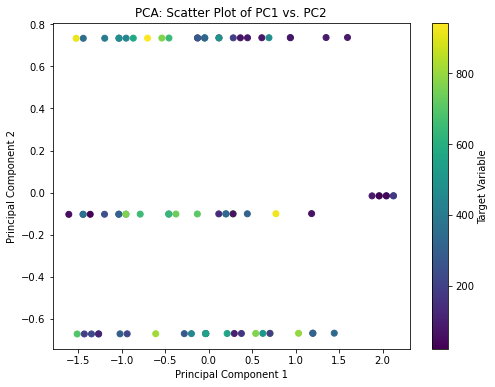

In [44]:

#Fit the PCA model to the training data to find the best variables

pca = PCA(n_components=2)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)


# Visualize the first two principal components (PC1 and PC2)
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Scatter Plot of PC1 vs. PC2')
plt.colorbar(label='Target Variable')
plt.show()

In [51]:
def Algorithm2(x_train, y_train, x_test, y_test):
    #Algorithm 2
    # Create a Random Forest Regressor)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Define the range of hyperparameters
    param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
    }

    # Create a GridSearchCV object with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

    # Fit the GridSearchCV object to the data
    grid_search.fit(x_train, y_train)
    
    # Get the best hyperparameters
    best_params = grid_search.best_params_
    
    # Train the final model with the best hyperparameters
    final_model = RandomForestRegressor(random_state=42, **best_params)
    final_model.fit(X_train, y_train)
    
    
    # Fit the model to the training data
    model.fit(x_train, y_train)

    # Use the model to predict the test data
    y_pred = model.predict(x_test)

    # Apply threshold of 0.5 to predicted values so that y_pred_a2 
    # will return discrete for classification
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    
    # Calculate mean squared error (MSE) to evaluate the performance of the model
    mse = mean_squared_error(y_test, y_pred)
    print("Mean squared error (MSE) of the model on the test set:", mse)
    print()

la2 = Algorithm2(x_train,y_train,x_test,y_test)

Mean squared error (MSE) of the model on the test set: 208382.588265

